<a href="https://colab.research.google.com/github/toche7/DSEssentials/blob/main/DecisionBoundaryDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Boundary Demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/toche7/DataSets/main/admit.csv")
y = data.Label
X = data[['SubjectA','SubjectB']]

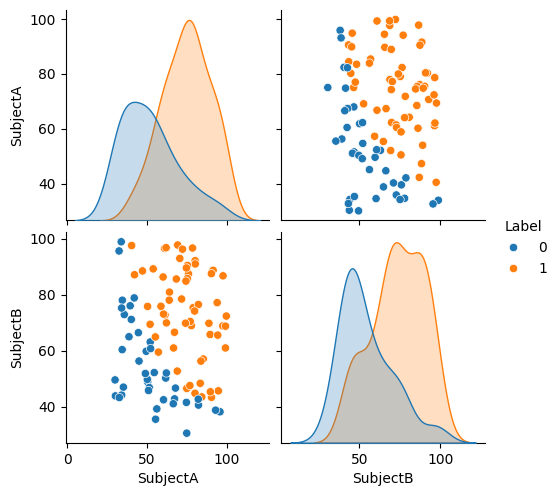

In [3]:
import seaborn as sns
sns.pairplot(data,hue= 'Label')

In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


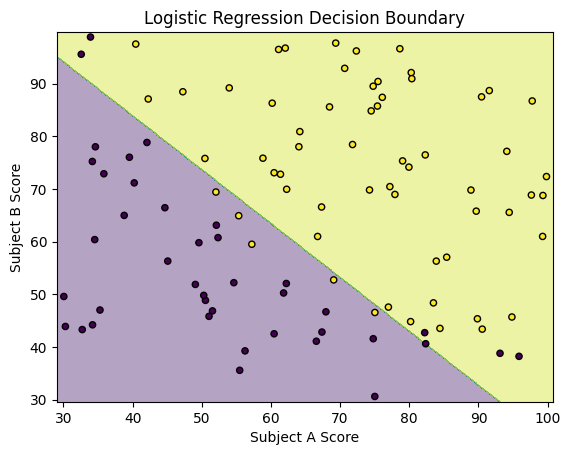

In [5]:
# prompt: create decision boundary of model

import matplotlib.pyplot as plt
import numpy as np
# Define a grid of points
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)

# Plot the data points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=20, edgecolor='k')

plt.xlabel('Subject A Score')
plt.ylabel('Subject B Score')
plt.title('Logistic Regression Decision Boundary')
plt.show()

In [9]:
model.score(X,y)

0.89

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


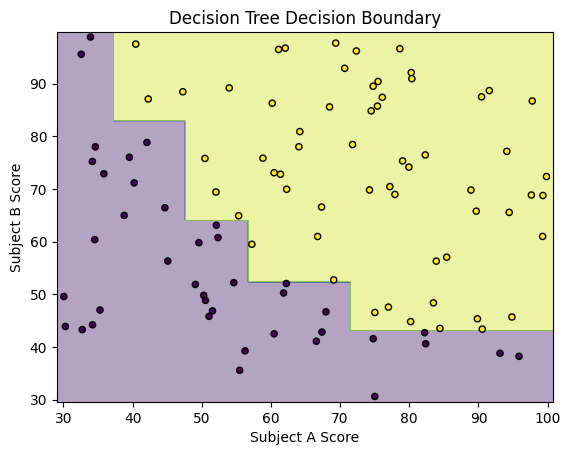

1.0

In [10]:
# prompt: create new model using decision tree

import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Create a new Decision Tree model
model_dt = DecisionTreeClassifier()

# Fit the Decision Tree model to the data
model_dt.fit(X, y)

# Predict the class for each point in the grid using the Decision Tree model
Z_dt = model_dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z_dt = Z_dt.reshape(xx.shape)

# Plot the decision boundary for the Decision Tree model
plt.figure()
plt.contourf(xx, yy, Z_dt, alpha=0.4)

# Plot the data points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=20, edgecolor='k')

plt.xlabel('Subject A Score')
plt.ylabel('Subject B Score')
plt.title('Decision Tree Decision Boundary')
plt.show()

# Evaluate the score of the Decision Tree model
model_dt.score(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


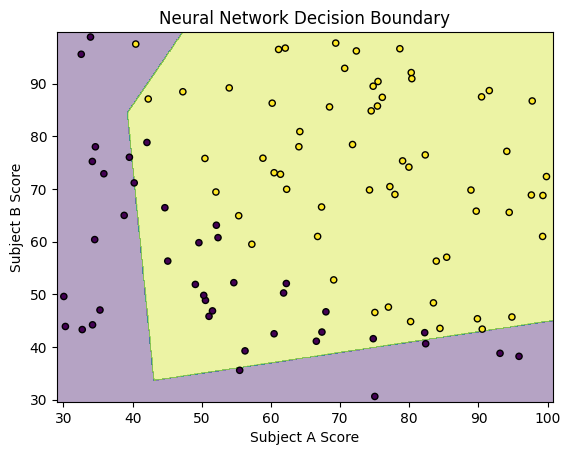

0.78

In [12]:
# prompt: create new model with neural network

import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier

# Create a new Neural Network model (MLPClassifier)
model_nn = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

# Fit the Neural Network model to the data
model_nn.fit(X, y)

# Predict the class for each point in the grid using the Neural Network model
Z_nn = model_nn.predict(np.c_[xx.ravel(), yy.ravel()])
Z_nn = Z_nn.reshape(xx.shape)

# Plot the decision boundary for the Neural Network model
plt.figure()
plt.contourf(xx, yy, Z_nn, alpha=0.4)

# Plot the data points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=20, edgecolor='k')

plt.xlabel('Subject A Score')
plt.ylabel('Subject B Score')
plt.title('Neural Network Decision Boundary')
plt.show()

# Evaluate the score of the Neural Network model
model_nn.score(X, y)


## Feature Engineering

In [6]:
# prompt: create polynomial degree 3 of X for feature engineering

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

print(f"Original shape: {X.shape}")
print(f"Polynomial features shape: {X_poly.shape}")
print("Polynomial features (first 5 rows):\n", X_poly[:5])

Original shape: (100, 2)
Polynomial features shape: (100, 10)
Polynomial features (first 5 rows):
 [[1.00000000e+00 3.46236596e+01 7.80246928e+01 1.19879781e+03
  2.70150041e+03 6.08785269e+03 4.15067672e+04 9.35358305e+04
  2.10783739e+05 4.75002836e+05]
 [1.00000000e+00 3.02867108e+01 4.38949975e+01 9.17284849e+02
  1.32943509e+03 1.92677081e+03 2.77815409e+04 4.02642162e+04
  5.83555502e+04 8.45755998e+04]
 [1.00000000e+00 3.58474088e+01 7.29021980e+01 1.28503672e+03
  2.61335489e+03 5.31473048e+03 4.60652364e+04 9.36820011e+04
  1.90519316e+05 3.87455534e+05]
 [1.00000000e+00 6.01825994e+01 8.63085521e+01 3.62194527e+03
  5.19427301e+03 7.44916616e+03 2.17978081e+05 3.12604852e+05
  4.48310183e+05 6.42926746e+05]
 [1.00000000e+00 7.90327361e+01 7.53443764e+01 6.24617337e+03
  5.95467222e+03 5.67677506e+03 4.93652171e+05 4.70614038e+05
  4.48651065e+05 4.27713077e+05]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


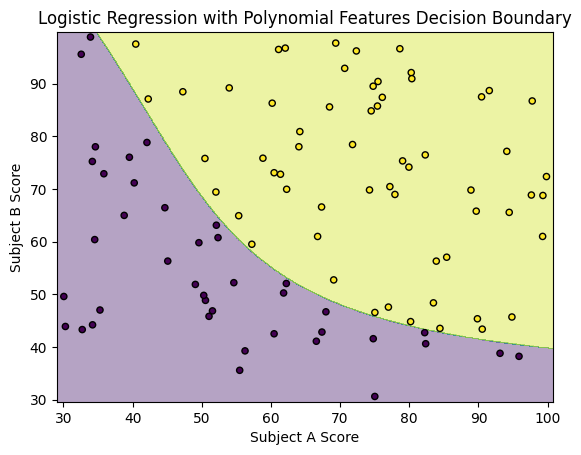

In [7]:
# prompt: train new model with new feature engineering

import matplotlib.pyplot as plt
import numpy as np
# ## Training the model with Polynomial Features

model_poly = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model_poly.fit(X_poly, y)

# # Decision Boundary for the new model

# Define a grid of points for the polynomial features
# We still use the original range for plotting purposes
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Transform the grid points using the same polynomial features
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_poly = poly.transform(grid_points)

# Predict the class for each point in the transformed grid
Z_poly = model_poly.predict(grid_points_poly)
Z_poly = Z_poly.reshape(xx.shape)

# Plot the decision boundary for the polynomial model
plt.contourf(xx, yy, Z_poly, alpha=0.4)

# Plot the data points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=20, edgecolor='k')

plt.xlabel('Subject A Score')
plt.ylabel('Subject B Score')
plt.title('Logistic Regression with Polynomial Features Decision Boundary')
plt.show()

In [8]:
model_poly.score(X_poly,y)

1.0